In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import pandas as pd

In [6]:
Data = pd.read_csv('C:/Users/Jazi/Desktop/Data Science Challange by Jazib/Forcasting Yearly/Yearlydata.csv')
Data

,Date,Price,Open,High,Low,Change %
0,1992,25.193,25.193,25.193,25.193,0.00%
1,1993,30.090,30.090,30.090,30.090,0.23%
2,1994,30.769,30.769,30.769,30.769,0.49%
3,1995,34.216,34.216,34.216,34.216,0.00%
4,1996,40.080,40.080,40.080,40.080,0.00%
5,1997,44.006,44.006,44.006,44.006,0.00%
6,1998,49.700,49.700,49.700,49.700,-7.71%
7,1999,51.815,51.790,51.815,51.790,-0.26%
8,2000,58.150,57.800,58.150,57.800,1.04%
9,2001,59.900,60.810,61.050,59.750,-1.48%


In [7]:
print("Number of rows::   ",Data.shape[0])
print("Number of columns:: ",Data.shape[1])

Number of rows::    31
Number of columns::  6


In [8]:
Data.keys()

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %'], dtype='object')

In [10]:
print("Column Data Types::\n",Data.dtypes)

Column Data Types::
 Date          int64
Price       float64
Open        float64
High        float64
Low         float64
Change %     object
dtype: object


In [11]:
print("Columns with Missing Values::",Data.columns[Data.isnull().any()].tolist())

Columns with Missing Values:: []


In [14]:
print("Number of rows with Missing Values::",len(pd.isnull(Data).any(1).nonzero()[0].tolist()))

Number of rows with Missing Values:: 0


C:\Users\Jazi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


In [16]:
Data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
dtype: bool

In [20]:
feature = Data.iloc[0: , 0:2,]

In [21]:
feature

,Date,Price
0,1992,25.193
1,1993,30.090
2,1994,30.769
3,1995,34.216
4,1996,40.080
5,1997,44.006
6,1998,49.700
7,1999,51.815
8,2000,58.150
9,2001,59.900


In [26]:
Data['Price'].describe()

count     31.000000
mean      83.051097
std       45.090474
min       25.193000
25%       54.522500
50%       61.650000
75%      104.525000
max      202.300000
Name: Price, dtype: float64

In [31]:
where_condition = Data.loc[ (Data.Price) >= 170,:]

In [32]:
where_condition

,Date,Price,Open,High,Low,Change %
29,2021,175.8,176.1,178.660,174.80,0.05%
30,2022,202.3,185.7,202.375,185.25,9.12%


In [149]:
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        end_ix = i + n_features
        if end_ix > len(timeseries_data)-1:
            break
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [47]:
#extract_feature =Data['Price']

In [39]:
#extract_feature

0      25.193
1      30.090
2      30.769
3      34.216
4      40.080
5      44.006
6      49.700
7      51.815
8      58.150
9      59.900
10     58.225
11     57.230
12     59.425
13     59.770
14     60.790
15     61.650
16     79.125
17     84.400
18     85.600
19     89.780
20     97.170
21    105.250
22    100.650
23    104.700
24    104.350
25    110.400
26    139.800
27    154.500
28    159.750
29    175.800
30    202.300
Name: Price, dtype: float64

In [64]:
timeseries_data =Data['Price']
n_steps = 1
X, y = prepare_data(timeseries_data, n_steps)

In [65]:
print(X),print(y)

[[ 25.193]
 [ 30.09 ]
 [ 30.769]
 [ 34.216]
 [ 40.08 ]
 [ 44.006]
 [ 49.7  ]
 [ 51.815]
 [ 58.15 ]
 [ 59.9  ]
 [ 58.225]
 [ 57.23 ]
 [ 59.425]
 [ 59.77 ]
 [ 60.79 ]
 [ 61.65 ]
 [ 79.125]
 [ 84.4  ]
 [ 85.6  ]
 [ 89.78 ]
 [ 97.17 ]
 [105.25 ]
 [100.65 ]
 [104.7  ]
 [104.35 ]
 [110.4  ]
 [139.8  ]
 [154.5  ]
 [159.75 ]
 [175.8  ]]
[ 30.09   30.769  34.216  40.08   44.006  49.7    51.815  58.15   59.9
  58.225  57.23   59.425  59.77   60.79   61.65   79.125  84.4    85.6
  89.78   97.17  105.25  100.65  104.7   104.35  110.4   139.8   154.5
 159.75  175.8   202.3  ]


(None, None)

In [66]:
X.shape

(30, 1)

In [67]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [94]:
model = Sequential()
model.add(LSTM(55, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(55, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 9340.5664
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 9314.8330
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 9289.7246
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 9265.2031
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 9241.7119
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 9221.3223
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 9201.8857
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 9182.5215
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 9163.1875
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 9143.8242
Epoch 11/100
1/1 [==============================] - 0s 16ms/step - loss: 9124.4385
Epoch 12/100
1/1 [==============================] - 0s 0s/step - loss: 9104.9629
Epoch 13/100
1/1 [=============

In [95]:
thirty_years_data=timeseries_data
thirty_years_data

0      25.193
1      30.090
2      30.769
3      34.216
4      40.080
5      44.006
6      49.700
7      51.815
8      58.150
9      59.900
10     58.225
11     57.230
12     59.425
13     59.770
14     60.790
15     61.650
16     79.125
17     84.400
18     85.600
19     89.780
20     97.170
21    105.250
22    100.650
23    104.700
24    104.350
25    110.400
26    139.800
27    154.500
28    159.750
29    175.800
30    202.300
Name: Price, dtype: float64

In [96]:
x_input = ([159.75,175.8,202.3])

temp_input=list(x_input)
lst_output=[]
i=0
while(i<3):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} Year input {}".format(i,x_input))
        #print(x_input)
        x_input = np.array(x_input).reshape((3, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = np.array(x_input).reshape((3, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    
print(lst_output)

[187.0879]
1 Year input [175.8        202.3        187.08790588]
1 day output [[205.88356]
 [236.83698]
 [219.07784]]
2 Year input [202.3        187.08790588 205.88356018]
2 day output [[236.83698]
 [219.07784]
 [241.01778]]
[187.0879, 205.88356, 236.83698]


In [99]:
print("Original Price   \n",timeseries_data)

Original Price   
 0      25.193
1      30.090
2      30.769
3      34.216
4      40.080
5      44.006
6      49.700
7      51.815
8      58.150
9      59.900
10     58.225
11     57.230
12     59.425
13     59.770
14     60.790
15     61.650
16     79.125
17     84.400
18     85.600
19     89.780
20     97.170
21    105.250
22    100.650
23    104.700
24    104.350
25    110.400
26    139.800
27    154.500
28    159.750
29    175.800
30    202.300
Name: Price, dtype: float64


In [100]:
len(timeseries_data)

31

In [101]:
lst_output

[187.0879, 205.88356, 236.83698]

In [102]:
import matplotlib.pyplot as plt

In [111]:
Year_usd={
    
    "Year":['2023'],
    "USD_Price":[236.83698]
}
df=pd.DataFrame(Year_usd)

In [113]:
print("Prediction of 2023  \n",df.head())

Prediction of 2023  
    Year  USD_Price
0  2023  236.83698


In [121]:
df.head()

,Year,USD_Price
0,2023,236.83698


In [122]:
data= pd.read_csv("C:/Users/Jazi/Desktop/Data Science Challange by Jazib/Forcasting Yearly/Yearlydata.csv")

In [130]:
data.tail()

,Date,Price,Open,High,Low,Change %
26,2018,139.80,138.900,139.990,133.95,0.65%
27,2019,154.50,155.275,156.755,154.12,-0.42%
28,2020,159.75,159.500,164.125,159.05,0.60%
29,2021,175.80,176.100,178.660,174.80,0.05%
30,2022,202.30,185.700,202.375,185.25,9.12%


In [125]:
data1=pd.read_csv("C:/Users/Jazi/Desktop/Data Science Challange by Jazib/Forcasting Yearly/Forcasting_2023.csv")

In [126]:
data1

,Year,USD Rate
0,2023,236.83698


Text(0.5, 0, 'Year')

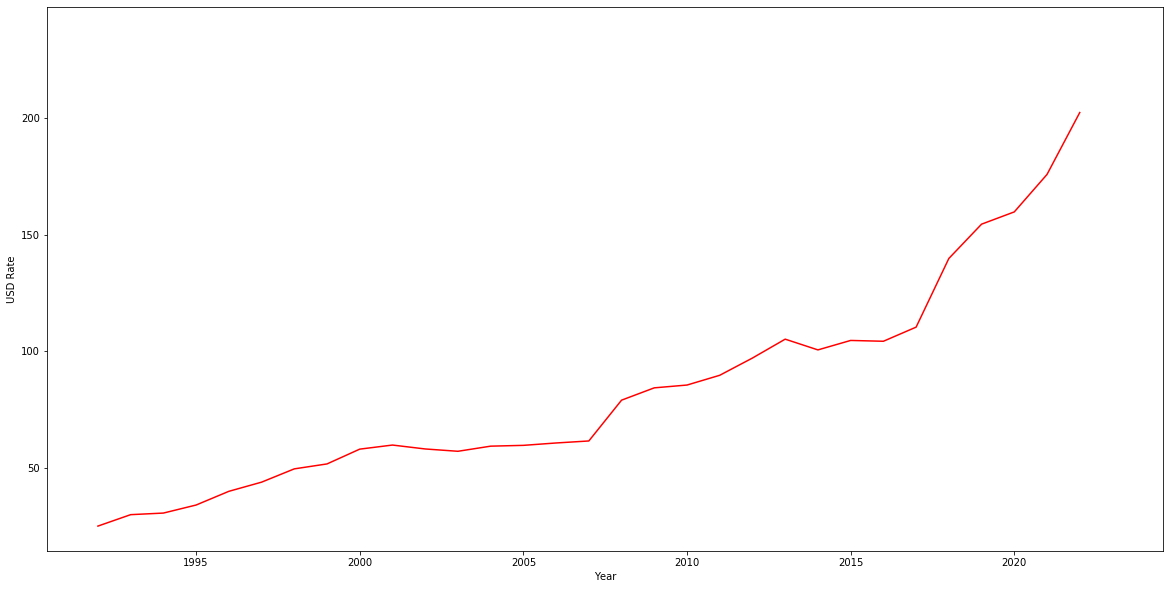

In [139]:
plt.figure(figsize=(20,10))
x=data1['Year']
y=data1['USD Rate']
x1=data['Date']
y1=data['Price']
plt.plot(x,y,color='b',label='Original USD Rate')
plt.plot(x1,y1,color='r',label='Predicted USD Rate')
plt.ylabel('USD Rate')
plt.xlabel('Year')     #in this ghraph there is a mistake so please consider the last one of histogram

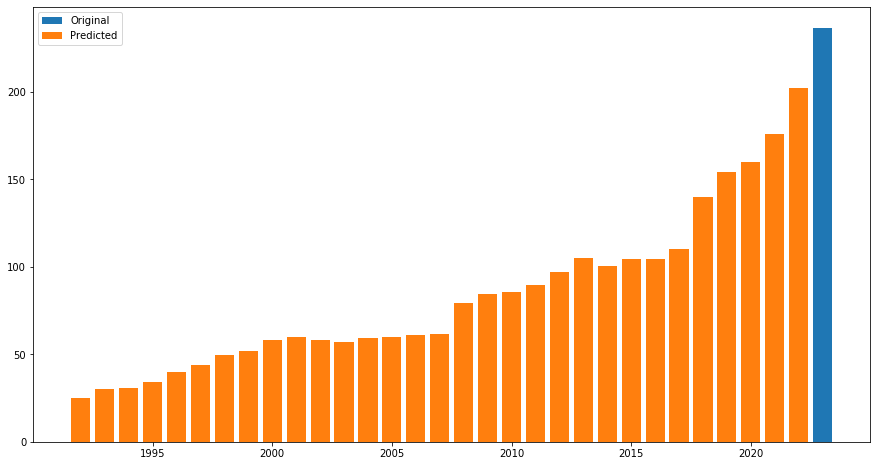

In [148]:
plt.figure(figsize=(15,8))
plt.bar(x,y, label='Original')
plt.bar(x1,y1, label='Predicted')
plt.legend()

# # In 2023 the Us dollar rate will be 236.83 according to the prediction